In [1]:
# encoding=utf8

# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carga de datos
data = pd.read_csv('data/clean_Data.csv')
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,3
1,28830,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,2
2,94947,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,3
3,590882,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,2
4,201944,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [4]:
corr_matrix = data.corr()
corr_matrix.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,1.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
geo_level_1_id,-0.00,1.00,-0.06,0.00,-0.09,-0.00,0.07,-0.06,-0.02,-0.15,...,0.00,0.02,0.00,0.00,0.00,-0.00,0.00,0.00,-0.02,-0.07
geo_level_2_id,0.00,-0.06,1.00,0.00,0.05,0.01,-0.05,0.04,0.02,0.08,...,-0.01,-0.03,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.01,0.04
geo_level_3_id,-0.00,0.00,0.00,1.00,-0.02,-0.01,-0.01,-0.02,-0.02,0.03,...,-0.00,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.01
count_floors_pre_eq,-0.00,-0.09,0.05,-0.02,1.00,0.09,0.10,0.77,0.17,-0.03,...,0.08,0.04,0.02,0.01,-0.00,0.01,0.01,0.00,-0.00,0.12


In [5]:
columns_for_correlation = data.columns.to_list()
columns_for_correlation.remove('building_id')
columns_for_correlation.remove('damage_grade')
columns_for_correlation

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_sec

In [6]:
damage_correlation = pd.DataFrame(columns=['colum_name', 'correlation'])
for col in columns_for_correlation:
    correlation = data[[col, 'damage_grade']].corr()
    damage_correlation.loc[len(damage_correlation)] = [col, correlation.min().min()]

damage_correlation = damage_correlation.set_index('colum_name').sort_values(by='correlation', ascending=False)
damage_correlation.head(10)

,correlation
colum_name,
other_floor_type,1.00
foundation_type,1.00
legal_ownership_status,1.00
plan_configuration,1.00
position,1.00
ground_floor_type,1.00
roof_type,1.00
land_surface_condition,1.00
has_superstructure_mud_mortar_stone,0.29


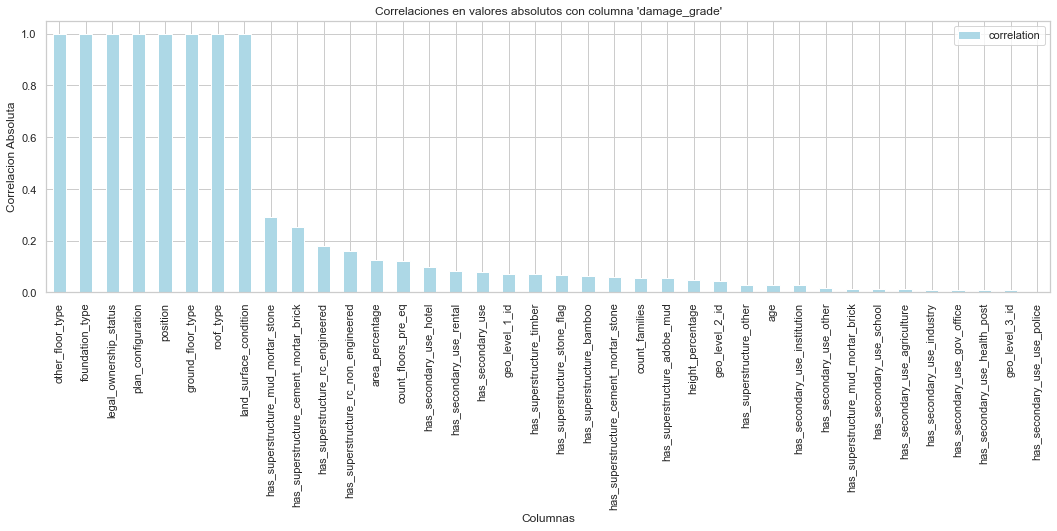

In [8]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [18, 5]

absolute_damage_correlation = damage_correlation.abs()

ax = absolute_damage_correlation.sort_values(by='correlation', ascending=False).plot.bar(color = "lightblue")
ax.set_xlabel("Columnas")
ax.set_ylabel("Correlacion Absoluta")
ax.set_title("Correlaciones en valores absolutos con columna 'damage_grade'")
plt.savefig("Correlaciones Pearson.jpg", bbox_inches='tight')